In [49]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [50]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [51]:
import os
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from SSMuLA.fitness_process_vis import parse_lib_stat
from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE, LIB_COLORS
from SSMuLA.zs_analysis import (
    ZS_OPTS,
    ZS_COMB_OPTS,
    ZS_OPTS_LEGEND,
)

%matplotlib inline

In [52]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
TOTAL_N_LIST = [n + 96 for n in N_SAMPLE_LIST]

In [66]:
lib_stat = parse_lib_stat(
    lib_csv_path="results/fitness_distribution/max/all_lib_stats.csv", n_mut_cuttoff=0
)
lib_stat

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,scale,peaks,peak_kde,percentiles,pdf_values,parent_rank_percent,Q1,Q2,Q3,numb_kde_peak
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.001737,"[0.1275662158236592, 0.5084256342965795, 0.606...","[18.95715826406059, 0.17704519880582167, 0.098...","[0.1151661417338432, 0.1212571134074551, 0.122...","[15.199742695395578, 15.667091596432273, 16.11...",0.075250,0.125979,0.127567,0.129802,7
3,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,0.109906,"[0.03337870027347259, 0.6106664209434821, 0.85...","[2.870133679609529, 0.40012326949250876, 0.421...","[-0.2192609576095971, -0.11180451121954202, -0...","[0.026974121384613872, 0.028121215058096317, 0...",0.001522,0.023743,0.112118,0.374642,3
6,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,0.156732,"[0.12255350949782506, 0.2818697911295817, 0.89...","[1.5849621685610578, 1.5168268815479706, 0.556...","[-0.2057345859857947, -0.0879267691331092, -0....","[0.01869666257662742, 0.01949003646085834, 0.0...",0.000888,0.112217,0.276349,0.470212,3
9,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.000279,"[0.001001001001001001, 0.15015015015015015, 0....","[84.94812751924495, 0.14711297529110418, 0.091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[84.45520645025827, 84.94812751924495, 80.8935...",0.024397,0.000156,0.000386,0.001026,33
12,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,-0.737911,...,0.317509,"[-1.360811971107369, -0.5905672573016313]","[1.0289537887029054, 0.8287651791532954]","[-1.3822738981174358, -1.381359436680477, -1.3...","[1.0043748330554185, 1.0097504427895805, 1.014...",0.024238,-1.180495,-0.721054,-0.416116,2
15,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,0.018900,"[-0.7917824701915064, -0.7605090595208127, -0....","[0.0036245994071766735, 0.0021495792852726805,...","[-0.8377727800013499, -0.26246975122161975, -0...","[0.13783458085674552, 0.1361875808265587, 0.12...",0.004179,-0.030314,-0.011234,0.008629,27
18,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.024425,"[-0.3944951616078841, -0.3170232081852239, -0....","[0.005954476272084834, 0.020369915569709816, 0...","[-0.5794792136579096, -0.159409524561979, -0.1...","[0.005958068940422161, 0.005853464928384218, 0...",0.000125,-0.066102,-0.039751,-0.013193,9
21,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.017935,"[-0.3315353103440577, -0.25764490240877025, -0...","[0.00787295674657887, 0.017643469342674266, 0....","[-0.5064595413745341, -0.14947773198508532, -0...","[0.00789062638682396, 0.007669391706426372, 0....",0.000125,-0.074532,-0.055559,-0.036157,8
24,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.043500,"[-0.7129431024521451, -0.676881142400521, -0.4...","[0.0036129353359320897, 0.003617641013231226, ...","[-0.8012949045786242, -0.3009295839772114, -0....","[0.0035276345242041393, 0.003499097774177849, ...",0.000125,-0.120727,-0.073272,-0.026945,8
27,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.020788,"[-0.4327437550162602, -0.3044598574343214, 0.0...","[0.007988036362784934, 0.024487960087067218, 1...","[-0.4399507155545714, -0.11762175754299561, -0...","[0.007441392159327368, 0.007659122367135711, 0...",0.001288,-0.014157,0.005591,0.030403,13


In [59]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot.csv")
de_all = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")

In [60]:
mlde_new1 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_2/vis/all_df.csv")
mlde_new1

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,192,4000,0,0.353947,-0.725495,0.772854,-0.652027,0.901889,0.068644,0.0,6053.0,all,T7,Triad_score,384,max
1,one-hot,boosting,192,4000,1,-0.006285,-0.657884,0.753421,-0.684934,0.895304,0.073545,0.0,1138.0,all,T7,Triad_score,384,max
2,one-hot,boosting,192,4000,2,0.344423,-0.666008,0.753421,-0.593586,0.906548,0.087193,0.0,1133.0,all,T7,Triad_score,384,max
3,one-hot,boosting,192,4000,3,0.300714,-0.663973,0.772854,-0.638833,0.899634,0.049619,0.0,5632.0,all,T7,Triad_score,384,max
4,one-hot,boosting,192,4000,4,0.298176,-0.759246,0.665273,-0.665856,0.901516,0.074792,0.0,2825.0,all,T7,Triad_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47195,one-hot,ridge,384,159132,45,0.155994,-0.019967,0.346255,0.158834,0.992855,0.097631,0.0,121693.0,all,TEV,none,96,max
47196,one-hot,ridge,384,159132,46,0.129533,-0.012053,0.308933,0.016982,0.992438,0.106406,0.0,57692.0,all,TEV,none,96,max
47197,one-hot,ridge,384,159132,47,0.143227,-0.003959,0.347422,0.032141,0.992219,0.070418,0.0,72917.0,all,TEV,none,96,max
47198,one-hot,ridge,384,159132,48,0.193766,-0.006934,0.382593,0.102932,0.992691,0.094317,0.0,116573.0,all,TEV,none,96,max


In [61]:
mlde_new2 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_hm2zs_2/vis/all_df.csv")
mlde_new2

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,192,600,0,0.686709,-0.476878,0.799951,-0.732023,0.894288,0.006603,0.0,3457.0,double,T7,Triad_score,384,max
1,one-hot,boosting,192,600,1,0.534853,-0.629104,0.959441,-0.659679,0.902397,0.000028,0.0,4865.0,double,T7,Triad_score,384,max
2,one-hot,boosting,192,600,2,0.409324,-0.642034,0.772854,-0.668452,0.896822,0.035331,0.0,5320.0,double,T7,Triad_score,384,max
3,one-hot,boosting,192,600,3,0.486959,-0.685458,0.753421,-0.609581,0.907809,0.054396,0.0,5895.0,double,T7,Triad_score,384,max
4,one-hot,boosting,192,600,4,0.664071,-0.639025,0.753421,-0.627311,0.907690,0.035558,0.0,2494.0,double,T7,Triad_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,one-hot,ridge,384,2243,45,0.284975,-0.113981,0.382593,0.281597,0.994030,0.154046,0.0,19485.0,double,TEV,none,96,max
51996,one-hot,ridge,384,2243,46,0.265831,-0.068187,0.372234,0.216096,0.993694,0.151986,0.0,93687.0,double,TEV,none,96,max
51997,one-hot,ridge,384,2243,47,0.342739,-0.088412,0.383490,0.244466,0.993754,0.152285,0.0,59205.0,double,TEV,none,96,max
51998,one-hot,ridge,384,2243,48,0.270931,-0.085531,0.367318,0.217018,0.993771,0.152124,0.0,19953.0,double,TEV,none,96,max


In [62]:
mlde_new3 = pd.read_csv("/disk2/fli/SSMuLA/results/mlde_coves/vis/all_df.csv")
mlde_new3

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,24,4000,0,0.493834,0.159316,0.939394,0.156892,0.736576,0.107242,0.0,690.0,all,DHFR,coves_score,384,max
1,one-hot,boosting,24,4000,1,0.286923,0.149469,0.846404,0.168272,0.680630,0.103026,0.0,6671.0,all,DHFR,coves_score,384,max
2,one-hot,boosting,24,4000,2,0.484070,0.143173,1.000000,0.391713,0.811770,0.145107,1.0,60.0,all,DHFR,coves_score,384,max
3,one-hot,boosting,24,4000,3,0.132415,0.128501,0.152167,0.128569,0.654936,0.065345,0.0,6333.0,all,DHFR,coves_score,384,max
4,one-hot,boosting,24,4000,4,0.509727,0.285295,1.000000,0.390016,0.866241,0.313124,1.0,232.0,all,DHFR,coves_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152995,one-hot,ridge,384,300,45,0.513836,0.001163,0.932034,0.299605,0.982535,0.188766,0.0,345.0,double,TrpB4,coves_score,96,max
152996,one-hot,ridge,384,300,46,0.496327,-0.000750,0.932034,0.284585,0.982491,0.189280,0.0,299.0,double,TrpB4,coves_score,96,max
152997,one-hot,ridge,384,300,47,0.483363,0.000085,0.932034,0.336908,0.982643,0.189326,0.0,243.0,double,TrpB4,coves_score,96,max
152998,one-hot,ridge,384,300,48,0.497712,0.003950,0.932034,0.353083,0.982719,0.189646,0.0,190.0,double,TrpB4,coves_score,96,max


In [63]:
mlde_all = pd.concat([mlde_all, mlde_new1, mlde_new2, mlde_new3], axis=0)
mlde_all.to_csv("results/mlde/all_df_comb_onehot_2.csv", index=False)
mlde_all

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,192,4000,0,0.935697,0.153123,1.000000,0.409558,0.892434,0.437613,1.0,199.0,all,DHFR,Triad-esm_score,384,max
1,one-hot,boosting,192,4000,1,0.813921,0.164246,1.000000,0.455075,0.928627,0.482690,1.0,88.0,all,DHFR,Triad-esm_score,384,max
2,one-hot,boosting,192,4000,2,0.798997,0.163849,1.000000,0.490490,0.931763,0.446393,1.0,82.0,all,DHFR,Triad-esm_score,384,max
3,one-hot,boosting,192,4000,3,0.997845,0.157741,1.000000,0.484294,0.928540,0.406754,1.0,0.0,all,DHFR,Triad-esm_score,384,max
4,one-hot,boosting,192,4000,4,0.752007,0.146420,0.865538,0.456413,0.913301,0.445943,0.0,520.0,all,DHFR,Triad-esm_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152995,one-hot,ridge,384,300,45,0.513836,0.001163,0.932034,0.299605,0.982535,0.188766,0.0,345.0,double,TrpB4,coves_score,96,max
152996,one-hot,ridge,384,300,46,0.496327,-0.000750,0.932034,0.284585,0.982491,0.189280,0.0,299.0,double,TrpB4,coves_score,96,max
152997,one-hot,ridge,384,300,47,0.483363,0.000085,0.932034,0.336908,0.982643,0.189326,0.0,243.0,double,TrpB4,coves_score,96,max
152998,one-hot,ridge,384,300,48,0.497712,0.003950,0.932034,0.353083,0.982719,0.189646,0.0,190.0,double,TrpB4,coves_score,96,max


In [65]:
mlde_all["lib"].unique()

array(['DHFR', 'GB1', 'ParD2', 'ParD3', 'TrpB3A', 'TrpB3B', 'TrpB3C',
       'TrpB3D', 'TrpB3E', 'TrpB3F', 'TrpB3G', 'TrpB3H', 'TrpB3I',
       'TrpB4', 'T7', 'TEV'], dtype=object)

In [68]:
active_cutoff = 1
active_lib_list = lib_stat[(lib_stat["percent_active"]>active_cutoff) & (lib_stat["percent_measured"]>90)]["lib"].tolist()
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'TEV',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [69]:
def get_mlde_avg_df(mlde_all, n_top, n_mut_cutoff, zs, active_lib_list):
    avg_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"] == zs)
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})
    return avg_mlde

In [70]:
ZS_OPTS

['ed_score',
 'Triad_score',
 'ev_score',
 'esm_score',
 'esmif_score',
 'coves_score']

In [71]:
n_top = 96
avg_mlde_df_dict = {}

# just mlde
avg_mlde_df_dict["MLDE"] = get_mlde_avg_df(
    mlde_all, n_top, n_mut_cutoff="all", zs="none", active_lib_list=active_lib_list
)
avg_mlde_df_dict["ftMLDE: Edited distance"] = get_mlde_avg_df(
    mlde_all, n_top, n_mut_cutoff="double", zs="none", active_lib_list=active_lib_list
)

for zs in ZS_OPTS[1:-1]:
    avg_mlde_df_dict[f"ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_df(
        mlde_all, n_top, n_mut_cutoff="all", zs=zs, active_lib_list=active_lib_list
    )

In [72]:
de_avg = (
    de_all[de_all["lib"].isin(active_lib_list)][["de_type", "mean_all", "fraction_max"]]
    .groupby("de_type")
    .agg(["mean", "std"])
)
de_avg.columns = ["{}_{}".format(i, j) for i, j in de_avg.columns]
de_avg = de_avg.rename(columns={"de_type_": "de_type"})
de_avg

,mean_all_mean,mean_all_std,fraction_max_mean,fraction_max_std
de_type,,,,
recomb_SSM,0.617752,0.249051,0.116176,0.136778
single_step_DE,0.679734,0.233707,0.244412,0.187118
top96_SSM,0.756879,0.238759,0.381760,0.279454


In [73]:
avg_mlde_df_dict["Average ftMLDE"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[1:]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [74]:
def aggregate_alde_df(
    eq_n: int,
    lib_list: list,
    alde_model: str = "Boosting Ensemble",
    alde_encoding: str = "onehot",
    alde_acq: str = "GREEDY",
    alde_dir: str = "/disk2/fli/alde4ssmula",
) -> pd.DataFrame:

    """
    Aggregate ALDE results for a given list of libraries and equal n.

    Args:
    - eq_n (int): Equal n for the libraries.
    - lib_list (list): List of libraries to aggregate.

    Returns:
    - df (pd.DataFrame): Aggregated ALDE results.
    """

    df = pd.DataFrame(
        columns=[
            "n_sample",
            "top_maxes_mean",
            "top_maxes_std",
            "if_truemaxs_mean",
            "if_truemaxs_std",
        ]
    )

    for n in N_SAMPLE_LIST:

        if eq_n == 1:
            a_df = pd.read_csv(
                f"{alde_dir}/results/all_{str(n)}+96/all_results.csv"
            )
        else:
            a_df = pd.read_csv(
                f"{alde_dir}/results/{str(eq_n)}eq_{str(int((n+96)/eq_n))}/all_results.csv"
            )

        # DNN Ensemble
        # Boosting Ensemble
        slice_df = a_df[
            (a_df["Encoding"] == alde_encoding)
            & (a_df["Acquisition"] == alde_acq)
            & (a_df["Model"] == alde_model)
            & (a_df["Timestep"] == a_df["Timestep"].max())
            & (a_df["Protein"].isin(lib_list))
        ]
        # print(slice_df)
        df = df._append(
            {
                "n_sample": n,
                "top_maxes_mean": slice_df["Mean"].mean(),
                "top_maxes_std": slice_df["Mean"].std(),
                "if_truemaxs_mean": slice_df["Frac"].mean(),
                "if_truemaxs_std": slice_df["Frac"].std(),
            },
            ignore_index=True,
        )
    return df

In [75]:
for eq_n in [1, 2, 3, 4]:

    avg_mlde_df_dict[f"ALDE x {eq_n}"] = aggregate_alde_df(
        eq_n, active_lib_list, alde_model="Boosting Ensemble"
    )

In [76]:
PRESENTATION_PALETTE_SATURATE["yellow5"] = "#c69600"
PRESENTATION_PALETTE_SATURATE["yellow6"] = "#8f6c00"
PRESENTATION_PALETTE_SATURATE["yellow7"] = "#594400"

In [77]:
PRESENTATION_PALETTE_SATURATE["black"] = "#000000"

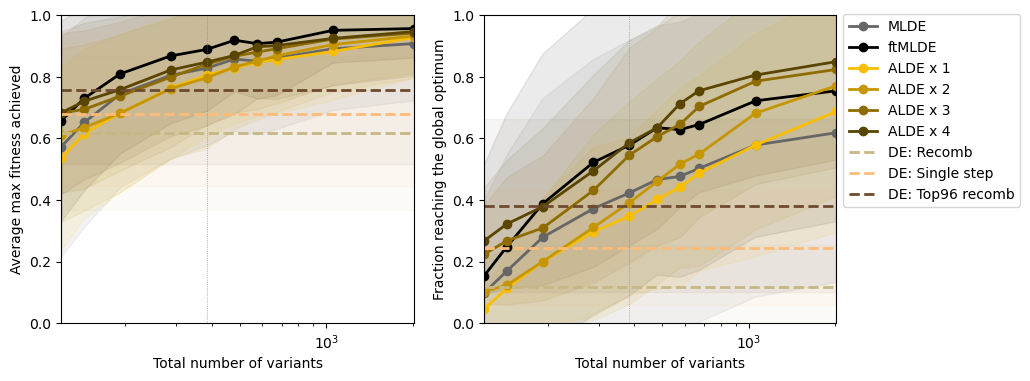

In [78]:
# for avg cross number of samples
n_top = 96
n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "black", "yellow", "yellow5", "yellow6", "yellow7"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (mlde_opts) in enumerate(
        ["MLDE", "Average ftMLDE", "ALDE x 1", "ALDE x 2", "ALDE x 3", "ALDE x 4"]
    ):
        mlde_df = avg_mlde_df_dict[mlde_opts]

        ax.plot(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            # label=label_app+mlde_opts,
            label=mlde_opts.replace("Average ", ""),
            marker="o",
            linestyle="solid",
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
        )
        ax.fill_between(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.08,
        )

    for de in DE_TYPES:
        ax.axhline(
            de_avg.loc[de, f"{de_metric}_mean"],
            label=f"DE: {DE_LEGEND_MAP[de]}",
            color=DE_COLORS[de],
            linestyle="dashed",
            linewidth=2,
        )
        ax.fill_between(
            TOTAL_N_LIST,  # N_SAMPLE_LIST,
            de_avg.loc[de, f"{de_metric}_mean"] - de_avg.loc[de, f"{de_metric}_std"],
            de_avg.loc[de, f"{de_metric}_mean"] + de_avg.loc[de, f"{de_metric}_std"],
            color=DE_COLORS[de],
            alpha=0.05,
        )

    # add vline
    ax.axvline(n_corr, color="gray", linewidth=0.5, linestyle="dotted")

    # ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    # ax.set_xlabel("Number of training samples")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))

# fig.suptitle(
#     "(ft)MLDE vs DE Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
# )

In [82]:
# look at non-active
non_active_libs = lib_stat[lib_stat["percent_active"]<active_cutoff]["lib"].tolist()

n_top = 96
avg_mlde_nonactive_df_dict = {}

# just mlde
avg_mlde_nonactive_df_dict["MLDE"] = get_mlde_avg_df(
    mlde_all, n_top, n_mut_cutoff="all", zs="none", active_lib_list=non_active_libs
)
avg_mlde_nonactive_df_dict["ftMLDE: Edited distance"] = get_mlde_avg_df(
    mlde_all, n_top, n_mut_cutoff="double", zs="none", active_lib_list=non_active_libs
)

for zs in ZS_OPTS[1:-1]:
    avg_mlde_nonactive_df_dict[f"ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_df(
        mlde_all, n_top, n_mut_cutoff="all", zs=zs, active_lib_list=non_active_libs
    )

de_non_active_avg = (
    de_all[de_all["lib"].isin(non_active_libs)][["de_type", "mean_all", "fraction_max"]]
    .groupby("de_type")
    .agg(["mean", "std"])
)
de_non_active_avg.columns = ["{}_{}".format(i, j) for i, j in de_non_active_avg.columns]
de_non_active_avg = de_non_active_avg.rename(columns={"de_type_": "de_type"})

avg_mlde_nonactive_df_dict["Average ftMLDE"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_nonactive_df_dict.values())[1:]), axis=0),
    columns=avg_mlde_nonactive_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [83]:
for eq_n in [1, 2, 3, 4]:

    avg_mlde_nonactive_df_dict[f"ALDE x {eq_n}"] = aggregate_alde_df(
        eq_n, non_active_libs, alde_model="Boosting Ensemble"
    )

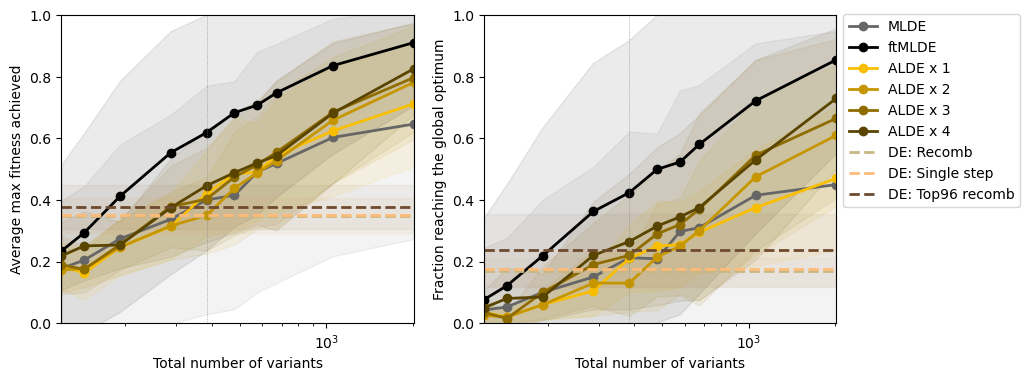

In [84]:
# for avg cross number of samples
n_top = 96
n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "black", "yellow", "yellow5", "yellow6", "yellow7"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (mlde_opts) in enumerate(["MLDE", "Average ftMLDE", "ALDE x 1", "ALDE x 2", "ALDE x 3", "ALDE x 4"]):
        mlde_df = avg_mlde_nonactive_df_dict[mlde_opts]
        # if i == 0:
        #     label_app = "Vanilla "
        # else:
        #     label_app = ""

        ax.plot(
            # mlde_df.index,
            TOTAL_N_LIST, # mlde_df["n_sample"],
            mlde_df[f"{mlde_metric}_mean"],
            # label=label_app+mlde_opts,
            label=mlde_opts.replace("Average ", ""),
            marker="o",
            linestyle="solid",
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
        )
        ax.fill_between(
            # mlde_df.index,
            TOTAL_N_LIST, # mlde_df["n_sample"],
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.08,
        )

    for de in DE_TYPES:
        ax.axhline(
            de_non_active_avg.loc[de, f"{de_metric}_mean"],
            label=f"DE: {DE_LEGEND_MAP[de]}",
            color=DE_COLORS[de],
            linestyle="dashed",
            linewidth=2,
        )
        ax.fill_between(
            TOTAL_N_LIST, # N_SAMPLE_LIST,
            de_non_active_avg.loc[de, f"{de_metric}_mean"] - de_non_active_avg.loc[de, f"{de_metric}_std"],
            de_non_active_avg.loc[de, f"{de_metric}_mean"] + de_non_active_avg.loc[de, f"{de_metric}_std"],
            color=DE_COLORS[de],
            alpha=0.05,
        )

    # add vline
    ax.axvline(
        n_corr,
        color="gray",
        linewidth=0.5,
        linestyle="dotted"
    )

    # ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)


    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))

# fig.suptitle(
#     "(ft)MLDE vs DE Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
# )